In [1]:
# 這個Jupyter Notebook的環境
import warnings
warnings.filterwarnings('ignore')

import platform
import tensorflow
import keras
print("Platform: {}".format(platform.platform()))
print("Tensorflow version: {}".format(tensorflow.__version__))
print("Keras version: {}".format(keras.__version__))

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from IPython.display import Image

Platform: Linux-4.13.0-38-generic-x86_64-with-debian-stretch-sid
Tensorflow version: 1.7.0
Keras version: 2.1.5


Using TensorFlow backend.


In [3]:
from keras.models import load_model

model = load_model('cats_and_dogs_2.h5')
model.summary()  # 打印模型

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [12]:
img_path = 'data/train/dog/dog.3.jpg'

In [13]:
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path,target_size=(150,150))
img_tensor = image.img_to_array(img)
print('origin img_tensor shape: ',img_tensor.shape)

img_tensor = np.expand_dims(img_tensor,axis=0)
print("After reshape img_tensor shape: ", img_tensor.shape)

img_tensor /=255.

origin img_tensor shape:  (150, 150, 3)
After reshape img_tensor shape:  (1, 150, 150, 3)


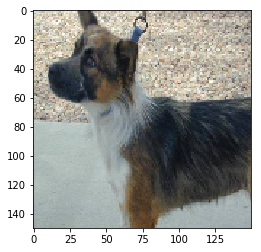

In [14]:
plt.imshow(img_tensor[0])
plt.show()

In [15]:
from keras import models

# 創建一個list來儲存前8層處理後的outputs
layer_outputs = [layer.output for layer in model.layers[:8]]

# 產生一個model物件, 它的input是原先模型的input, 而它的output則是前8層處理後的outputs
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

layer_outputs # 看一下物件的結構

[<tf.Tensor 'conv2d_9/Relu:0' shape=(?, 148, 148, 32) dtype=float32>,
 <tf.Tensor 'max_pooling2d_9/MaxPool:0' shape=(?, 74, 74, 32) dtype=float32>,
 <tf.Tensor 'conv2d_10/Relu:0' shape=(?, 72, 72, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_10/MaxPool:0' shape=(?, 36, 36, 64) dtype=float32>,
 <tf.Tensor 'conv2d_11/Relu:0' shape=(?, 34, 34, 128) dtype=float32>,
 <tf.Tensor 'max_pooling2d_11/MaxPool:0' shape=(?, 17, 17, 128) dtype=float32>,
 <tf.Tensor 'conv2d_12/Relu:0' shape=(?, 15, 15, 128) dtype=float32>,
 <tf.Tensor 'max_pooling2d_12/MaxPool:0' shape=(?, 7, 7, 128) dtype=float32>]

In [29]:
activations = activation_model.predict(img_tensor)
len(activations)

8

In [32]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


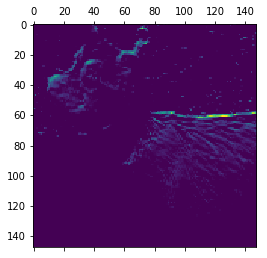

In [33]:
plt.matshow(first_layer_activation[0, :, :, 0]) #第0个channel的特征
plt.show()

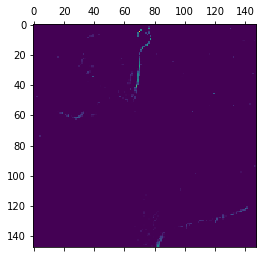

In [34]:
plt.matshow(first_layer_activation[0, :, :, 30], cmap='viridis')
plt.show()
#第30个channel的特征

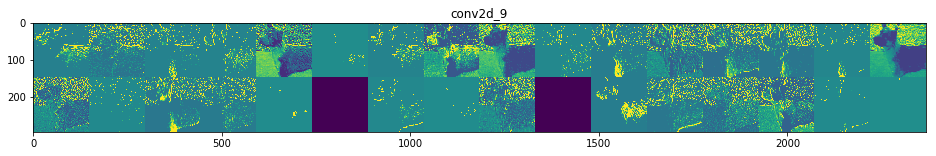

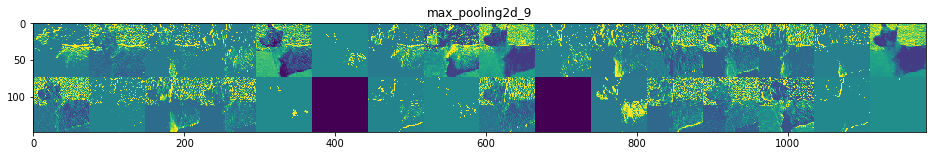

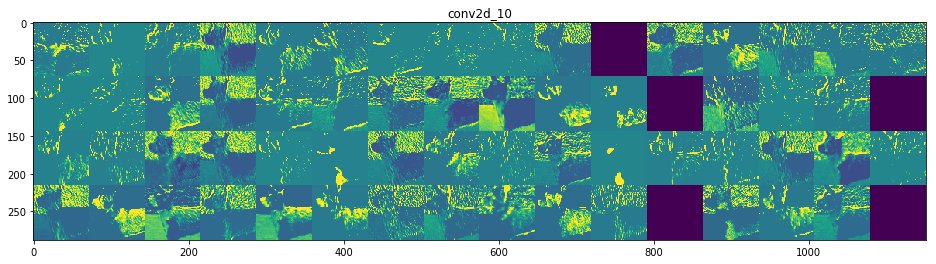

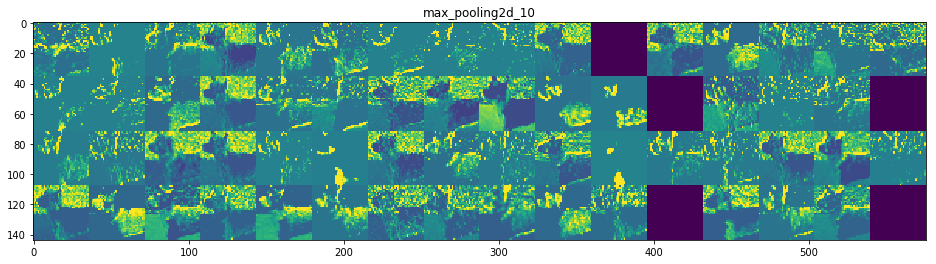

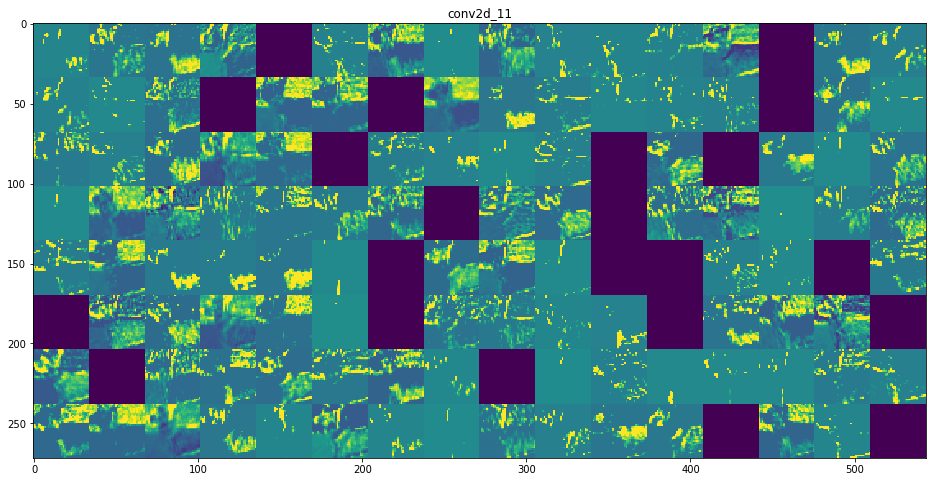

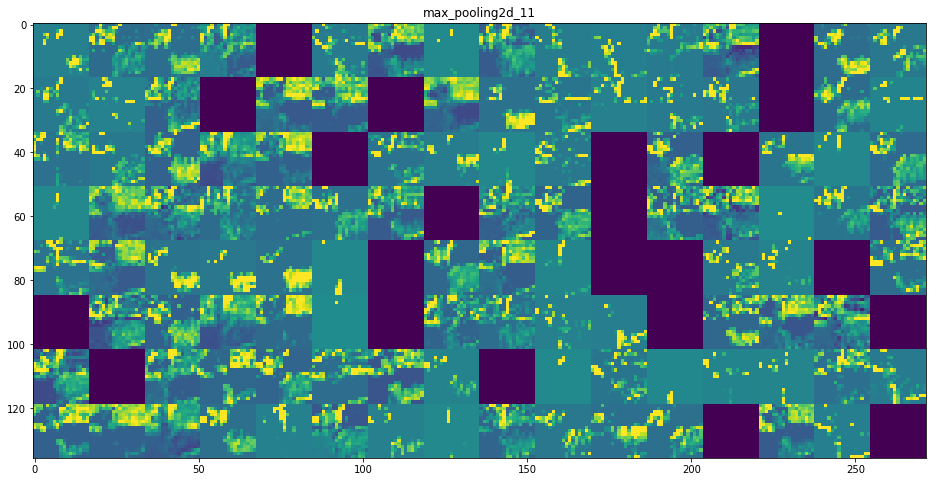

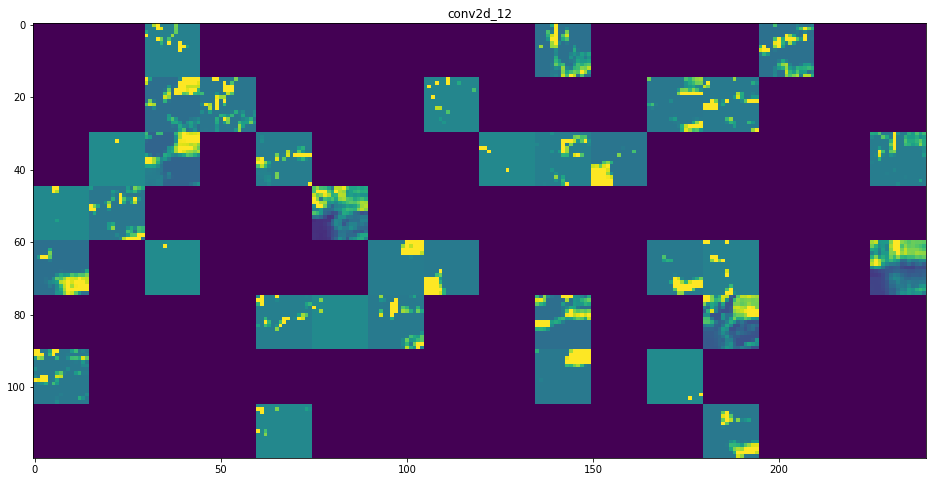

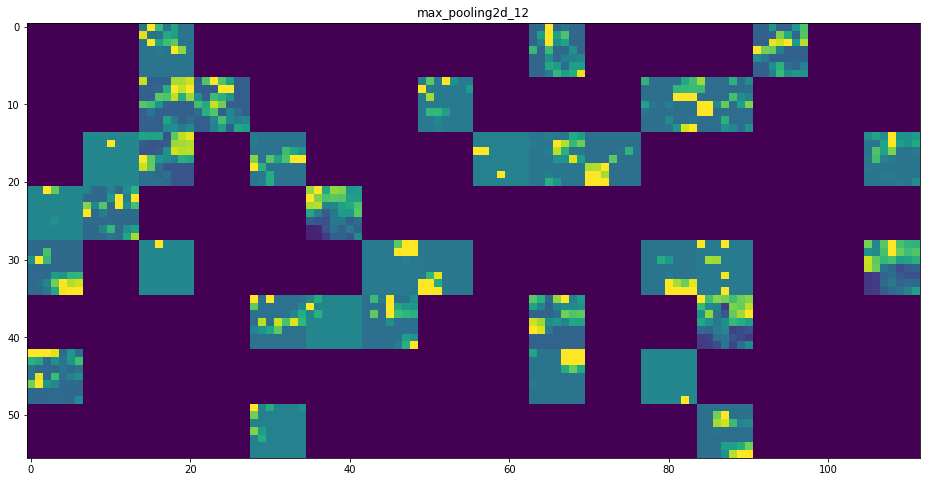

In [36]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
images_per_row = 16 #每行打印16个特征

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1] #最后一维三特征数
    size = layer_activation.shape[1]    #每个图片的尺寸
    
    n_cols = n_features//images_per_row    #行数
    display_grid = np.zeros((size*n_cols, images_per_row*size))  #容纳图片的大矩阵的尺寸
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:,:,col*images_per_row+row]
            channel_image-= channel_image.mean()
            channel_image/= channel_image.std()
            channel_image*=64
            channel_image+=128
            channel_image = np.clip(channel_image,0,255).astype('uint8')
            display_grid[col*size:(col+1)*size,row*size:(row+1)*size] = channel_image
            
    scale = 1./size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()